In [1]:
import string
import itertools
import tensorflow as tf
import keras
import pickle as pkl
import numpy as np

from keras import backend as K
from keras.datasets import mnist
from keras.models import Sequential, load_model, model_from_json
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

from sklearn.metrics import confusion_matrix

from KerasUtils import load_data, plot_confusion_matrix

%pylab inline

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


In [2]:
x_train, y_train, image_shape = load_data("../notMNIST_large")
print("data loaded")

loaded data shape: (529114, 28, 28, 1)
data loaded


In [3]:
# load json and model weights
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

loaded_model.load_weights("model.h5")

y_pred = loaded_model.predict(x_train)

In [4]:
# Verify loaded model still performs highly
loaded_model.evaluate(x_train,y_train)

529056/529114 [============================>.] - ETA: 0s

[0.28945820250028614, 0.91461575388651095]

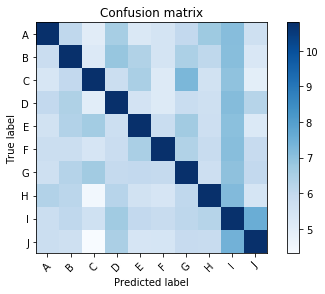

In [6]:
import pandas as pd

train_labels = pd.Series(np.argmax(y_train,axis=1))
pred_labels = pd.Series(np.argmax(y_pred,axis=1))

preclean_confusion_matrix = confusion_matrix(train_labels,pred_labels)

plot_confusion_matrix(preclean_confusion_matrix,string.ascii_uppercase[0:10],plt)

C:\Users\kelly634\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


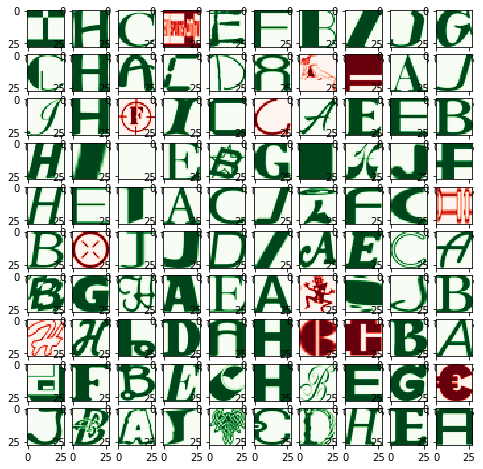

In [17]:
# visualizing the characters
# correct predictions in green, wrong predictions in red
random_char_indices = np.random.choice(range(x_train.shape[0]),100)

big_fig = plt.figure(figsize=(8,8))
index = 1
for an_index in random_char_indices:
    train_label = train_labels[an_index]
    pred_label =  pred_labels[an_index]
    big_fig.add_subplot(10,10,index)
    
    colormap = plt.cm.Greens if pred_label==train_label else plt.cm.Reds
    plt.imshow(
        x_train[an_index].reshape([28,28]),
        cmap = colormap
    )
    index+=1
big_fig.show()

# TO-DO
It would be nice to start looking at what the algorithm got wrong in the training set, since I suspect that most of the mislabeled characters will also be mislabeled by the trained algorithm, and that should help prioritize them for hand-labeling in a tool like Snorkel